Generate a plot to show the distribution of Severity Levels

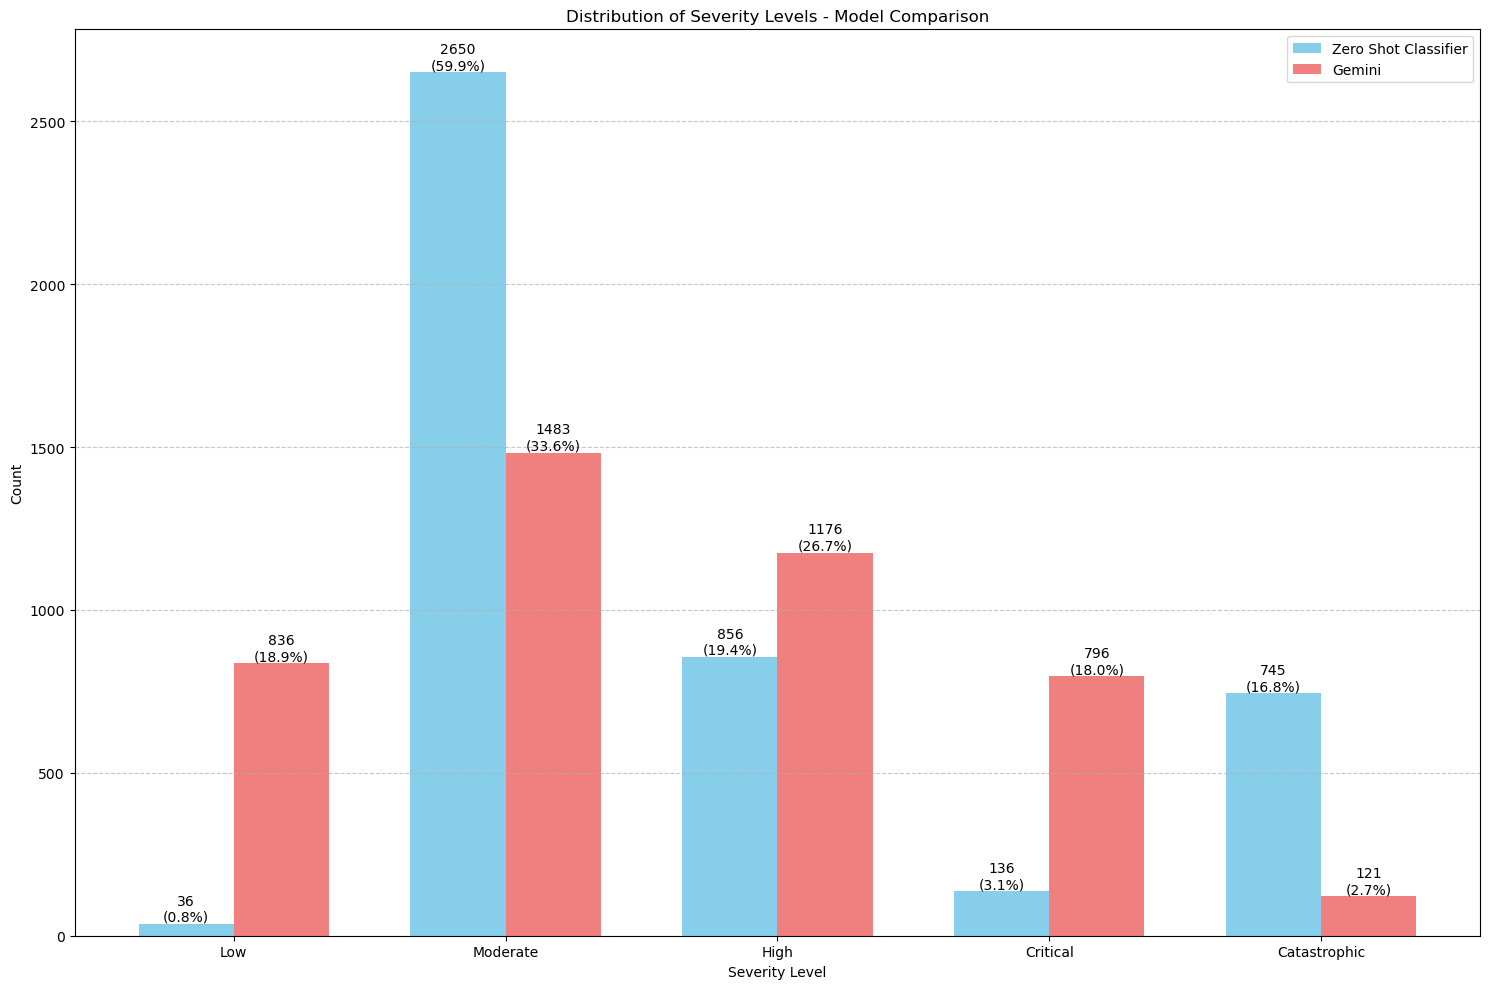


Detailed Percentage Breakdown:

Period 1:
Low: 36 (0.8%)
Moderate: 2650 (59.9%)
High: 856 (19.4%)
Critical: 136 (3.1%)
Catastrophic: 745 (16.8%)

Period 2:
Low: 836 (18.9%)
Moderate: 1483 (33.6%)
High: 1176 (26.7%)
Critical: 796 (18.0%)
Catastrophic: 121 (2.7%)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Create data
data = {
    'Severity': ['Low', 'Moderate', 'High', 'Critical', 'Catastrophic'],
    'Period1': [36, 2650, 856, 136, 745],
    'Period2': [836, 1483, 1176, 796, 121]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate percentages
total_period1 = df['Period1'].sum()
total_period2 = df['Period2'].sum()

df['Period1_Pct'] = (df['Period1'] / total_period1 * 100).round(1)
df['Period2_Pct'] = (df['Period2'] / total_period2 * 100).round(1)

# Set figure size
plt.figure(figsize=(15, 10))

# Set bar width
bar_width = 0.35

# Set positions of bars on x-axis
r1 = range(len(df['Severity']))
r2 = [x + bar_width for x in r1]

# Create bars
bars1 = plt.bar(r1, df['Period1'], width=bar_width, label='Zero Shot Classifier', color='skyblue')
bars2 = plt.bar(r2, df['Period2'], width=bar_width, label='Gemini', color='lightcoral')

# Add value and percentage labels on top of each bar
def add_labels(bars, percentages):
    for bar, percentage in zip(bars, percentages):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height,
                f'{int(height)}\n({percentage}%)',
                ha='center', va='bottom')

add_labels(bars1, df['Period1_Pct'])
add_labels(bars2, df['Period2_Pct'])

# Add labels and title
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Distribution of Severity Levels - Model Comparison')

# Add xticks on the middle of the group bars
plt.xticks([r + bar_width/2 for r in range(len(df['Severity']))], df['Severity'])

# Add legend
plt.legend()

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

# Print detailed percentage breakdown
print("\nDetailed Percentage Breakdown:")
print("\nPeriod 1:")
for severity, count, pct in zip(df['Severity'], df['Period1'], df['Period1_Pct']):
    print(f"{severity}: {count} ({pct}%)")

print("\nPeriod 2:")
for severity, count, pct in zip(df['Severity'], df['Period2'], df['Period2_Pct']):
    print(f"{severity}: {count} ({pct}%)")

Generate a probability risk matrix

In [2]:
import pandas as pd

# Load data from CSV file
df = pd.read_csv('final_data_2.csv')

# 1. Count each severity level for each Risk Type
severity_counts = df.groupby(['Final Classification', 'predicted_severity']).size().reset_index(name='count')
print("Counts of each severity level for each Risk Type:")
print(severity_counts)

# 2. Calculate the average severity for each Risk Type
# Assuming `predicted_severity` can be converted to numeric, or handle it accordingly
try:
    df['predicted_severity_numeric'] = pd.to_numeric(df['predicted_severity'], errors='coerce')
    average_severity = df.groupby('Final Classification')['predicted_severity_numeric'].mean().reset_index(name='average_severity')
    print("\nAverage severity for each Risk Type:")
    print(average_severity)
except Exception as e:
    print(f"Error calculating average severity: {e}")

# 3. Pivot table to show counts of each severity level for each Risk Type
pivot_table = df.pivot_table(
    index='Final Classification',
    columns='predicted_severity_label',  # Ensure this is correct and unique
    values='predicted_severity',    # This should be just for counting occurrences
    aggfunc='count',
    fill_value=0
)
print("\nPivot table showing counts of each severity level per Risk Type:")
print(pivot_table)

# Save the results to CSV files if needed
# severity_counts.to_csv('severity_counts.csv', index=False)
# average_severity.to_csv('average_severity.csv', index=False)
# pivot_table.to_csv('pivot_severity_counts.csv')


Counts of each severity level for each Risk Type:
     Final Classification  predicted_severity  count
0   Cargo Damage and Loss                   1      1
1   Cargo Damage and Loss                   2     17
2   Cargo Damage and Loss                   3      7
3   Cargo Damage and Loss                   4      6
4   Cargo Damage and Loss                   5      1
..                    ...                 ...    ...
56           Vessel Delay                   1      5
57           Vessel Delay                   2     79
58           Vessel Delay                   3     38
59           Vessel Delay                   4     14
60           Vessel Delay                   5      2

[61 rows x 3 columns]

Average severity for each Risk Type:
                             Final Classification  average_severity
0                           Cargo Damage and Loss          2.656250
1                        Cargo or Ship Detainment          2.357143
2              Environmental Impact and Pollution